In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [33]:
energy_consumption = pd.read_csv("C:/Users/GL-FF-CR1/Desktop/hotel_energy.csv")

In [34]:
energy_consumption.head()

,hotel,enrgcons,area,age,numrooms,occrate,effrooms
0,1,"19,53,916","43,000",6,420,32.60%,136.92
1,2,"10,45,555","19,979",16,215,63.00%,135.45
2,3,"42,45,313","46,529",7,273,65.05%,177.59
3,4,"21,26,199","20,962",6,222,70.50%,156.51
4,5,"27,85,958","24,212",5,474,69.70%,330.38


In [35]:
energy_consumption = energy_consumption.iloc[:,1:]

In [36]:
energy_consumption.describe()

,age,numrooms,effrooms
count,19.000000,19.000000,19.000000
mean,7.789474,376.789474,229.052632
std,3.881279,148.210278,94.144893
min,3.000000,197.000000,104.020000
25%,5.000000,247.500000,157.880000
50%,6.000000,359.000000,179.500000
75%,11.000000,464.500000,308.325000
max,16.000000,787.000000,391.370000


In [37]:
energy_consumption.dtypes

enrgcons     object
area         object
age           int64
numrooms      int64
occrate      object
effrooms    float64
dtype: object

In [38]:
#Replacing string ',' to float
energy_consumption['enrgcons']=energy_consumption['enrgcons'].astype(str)
energy_consumption['enrgcons']=energy_consumption['enrgcons'].str.replace(',','')

energy_consumption['enrgcons']=energy_consumption['enrgcons'].astype('float')

In [39]:
energy_consumption['area']=energy_consumption['area'].astype(str)
energy_consumption['area']=energy_consumption['area'].str.replace(',','')

energy_consumption['area']=energy_consumption['area'].astype('float')

In [40]:
energy_consumption['occrate']=energy_consumption['occrate'].astype(str)
energy_consumption['occrate']=energy_consumption['occrate'].str.replace('%','')
energy_consumption['occrate'].astype('float')

energy_consumption['occrate']=energy_consumption['occrate'].astype('float')

In [41]:
energy_consumption.describe()

,enrgcons,area,age,numrooms,occrate,effrooms
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.848632e+06,46383.473684,7.789474,376.789474,61.571053,229.052632
std,4.283995e+06,23644.701538,3.881279,148.210278,13.139886,94.144893
min,1.045555e+06,19979.000000,3.000000,197.000000,32.600000,104.020000
25%,3.942819e+06,28501.000000,5.000000,247.500000,51.135000,157.880000
50%,5.558123e+06,45000.000000,6.000000,359.000000,63.510000,179.500000
75%,9.748722e+06,55117.000000,11.000000,464.500000,68.135000,308.325000
max,1.483743e+07,112200.000000,16.000000,787.000000,94.080000,391.370000


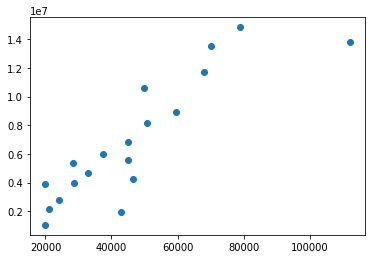

In [42]:
plt.scatter(energy_consumption['area'],energy_consumption['enrgcons'])

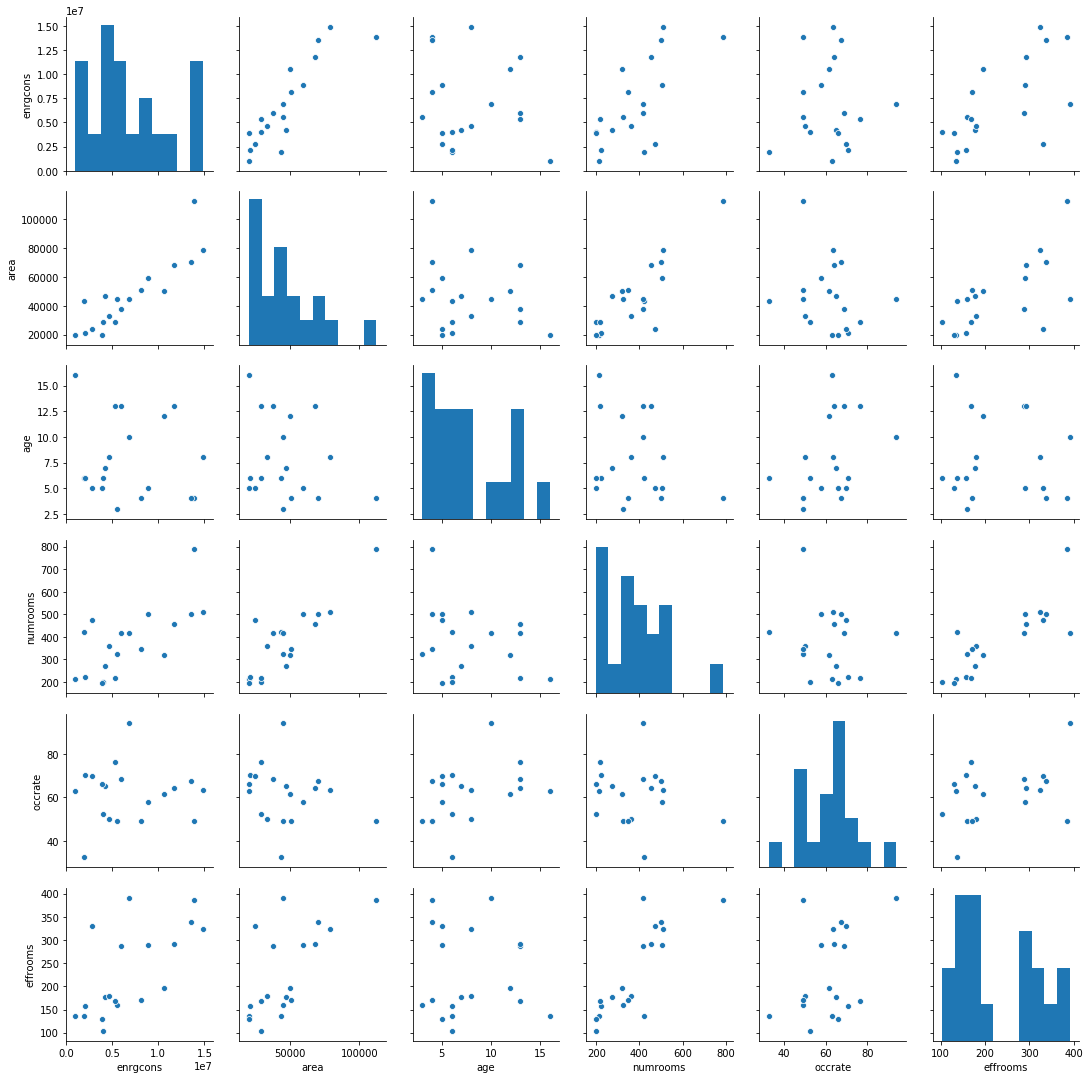

In [43]:
sns.pairplot(energy_consumption)

In [44]:
energy_consumption.corr()

,enrgcons,area,age,numrooms,occrate,effrooms
enrgcons,1.000000,0.878962,-0.099420,0.685091,0.031184,0.656769
area,0.878962,1.000000,-0.238941,0.852962,-0.210223,0.651138
age,-0.099420,-0.238941,1.000000,-0.275326,0.401544,-0.045080
numrooms,0.685091,0.852962,-0.275326,1.000000,-0.159418,0.826038
occrate,0.031184,-0.210223,0.401544,-0.159418,1.000000,0.405200
effrooms,0.656769,0.651138,-0.045080,0.826038,0.405200,1.000000


In [45]:
import scipy
from scipy import stats

In [46]:
# Partitioning the data

In [53]:
X = energy_consumption.loc[:,['area','numrooms','effrooms']].values

In [61]:
y = energy_consumption.loc[:,'enrgcons'].values

In [62]:
X,y

(array([[4.3000e+04, 4.2000e+02, 1.3692e+02],
        [1.9979e+04, 2.1500e+02, 1.3545e+02],
        [4.6529e+04, 2.7300e+02, 1.7759e+02],
        [2.0962e+04, 2.2200e+02, 1.5651e+02],
        [2.4212e+04, 4.7400e+02, 3.3038e+02],
        [1.1220e+05, 7.8700e+02, 3.8539e+02],
        [4.5000e+04, 3.2500e+02, 1.5925e+02],
        [2.8548e+04, 1.9900e+02, 1.0402e+02],
        [3.2865e+04, 3.5900e+02, 1.7950e+02],
        [5.9406e+04, 5.0300e+02, 2.9003e+02],
        [4.5000e+04, 4.1600e+02, 3.9137e+02],
        [3.7435e+04, 4.1800e+02, 2.8717e+02],
        [5.0828e+04, 3.4700e+02, 1.7003e+02],
        [6.8000e+04, 4.5500e+02, 2.9211e+02],
        [7.8868e+04, 5.1100e+02, 3.2454e+02],
        [2.8454e+04, 2.1900e+02, 1.6762e+02],
        [7.0000e+04, 5.0100e+02, 3.3853e+02],
        [2.0000e+04, 1.9700e+02, 1.3002e+02],
        [5.0000e+04, 3.1800e+02, 1.9557e+02]]),
 array([ 1953916.,  1045555.,  4245313.,  2126199.,  2785958., 13833968.,
         5558123.,  4001213.,  4669758.,  8924035.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
X_train, X_test, y_train, y_test

(array([[7.8868e+04, 5.1100e+02, 3.2454e+02],
        [7.0000e+04, 5.0100e+02, 3.3853e+02],
        [4.5000e+04, 3.2500e+02, 1.5925e+02],
        [2.4212e+04, 4.7400e+02, 3.3038e+02],
        [4.6529e+04, 2.7300e+02, 1.7759e+02],
        [1.1220e+05, 7.8700e+02, 3.8539e+02],
        [6.8000e+04, 4.5500e+02, 2.9211e+02],
        [5.9406e+04, 5.0300e+02, 2.9003e+02],
        [2.8548e+04, 1.9900e+02, 1.0402e+02],
        [2.0000e+04, 1.9700e+02, 1.3002e+02],
        [3.7435e+04, 4.1800e+02, 2.8717e+02],
        [2.0962e+04, 2.2200e+02, 1.5651e+02],
        [4.3000e+04, 4.2000e+02, 1.3692e+02],
        [2.8454e+04, 2.1900e+02, 1.6762e+02],
        [5.0828e+04, 3.4700e+02, 1.7003e+02]]),
 array([[45000.  ,   416.  ,   391.37],
        [19979.  ,   215.  ,   135.45],
        [32865.  ,   359.  ,   179.5 ],
        [50000.  ,   318.  ,   195.57]]),
 array([14837426., 13516215.,  5558123.,  2785958.,  4245313., 13833968.,
        11736136.,  8924035.,  4001213.,  3884425.,  6014590.,  2126199.

In [65]:
# Building Regression Equation

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
Regression_Model = LinearRegression()

In [68]:
Regression_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# Predicting the Test set results
y_predict = Regression_Model.predict(X_test)

In [70]:
y_predict

array([11407067.50847816,  2454053.0945477 ,  2833621.52765768,
        8063162.80404364])

In [72]:
#Regression Diagnostics

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
Regression_Model.coef_

array([   207.30098571, -26872.69476491,  35821.92911116])

In [75]:
Regression_Model.intercept_

-762064.2226829333

# Regression Equation is enrgcons = -762064.22 + 207.30 * area -26872.69 *numrooms + 35821.92 *effrooms'¶

In [76]:
# Rsquare values

In [77]:
Regression_Model.score(X_train,y_train)

0.9122646473846046

In [78]:
Regression_Model.score(X_test,y_test)

0.324676561120269

In [79]:
Regression_Model.score(X_test,y_predict)

1.0

In [80]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))

Mean squared error: 8070531650088.38


In [81]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predict))

Variance score: 0.32


Text(0.5, 1.0, 'Comparision between Actual energy consumption & Predicted energy consumption')

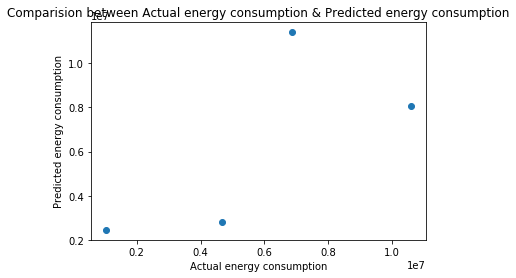

In [82]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual energy consumption")
plt.ylabel("Predicted energy consumption")
plt.title("Comparision between Actual energy consumption & Predicted energy consumption")

In [83]:
y_test
y_predict
#--------------------------------------
y_test2 = pd.DataFrame(y_test)

y_pred2 = pd.DataFrame(y_predict)
#----------------------------------------
y_test2.index = y_pred2.index

result = pd.concat((y_test2,y_pred2),join = 'outer', axis=1)

#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
Result = pd.concat([y_test2,y_pred2],axis=1, join_axes=[y_test2.index])

In [84]:
Result

,0,0
0,6865534.0,1.140707e+07
1,1045555.0,2.454053e+06
2,4669758.0,2.833622e+06
3,10573409.0,8.063163e+06
